In [8]:
library(tidyverse)

In [9]:
data_dir <- file.path("..", "data")
sql_dir <- file.path("..", "sql")

In [10]:
importance <- readRDS(file.path(data_dir, "feature_importance.rds")) %>%
rename(cov = var, inf = rel.inf) %>%
mutate(cov = str_replace_all(cov, "_", " ")) %>%
mutate(cov_ = cov) %>%
mutate(cov = str_replace_all(cov, "lab|vs|flag|first", "")) %>%
mutate(cov = str_replace_all(cov, "\\s+$|^\\s+", "")) %>%
mutate(cov = case_when(
    grepl("lab", cov_) ~ toupper(cov),
    TRUE ~ tools::toTitleCase(cov)
)) %>%
mutate(cov = case_when(
    cov == "Weight" ~ "Weight",
    cov == "Sapsii" ~ "SAPS Score",
    cov == "Sofa" ~ "SOFA Score",
    cov == "infection" ~ "Infection",
    cov == "Temp" ~ "Temperature",
    cov == "Map" ~ "MAP",
    cov == "Cvp" ~ "CVP (measured)",
    cov %in% c("TROPONIN", "BNP", "CREATININE KINASE") ~ paste(cov, "(tested)"),
    TRUE ~ cov
)) %>%
dplyr::select(-cov_)

importance




,cov,inf
,<chr>,<dbl>
lab_platelet_first,PLATELET,11.46112148
lab_wbc_first,WBC,11.16089374
weight,Weight,9.02132777
vs_heart_rate_first,Heart Rate,7.18336142
lab_hemoglobin_first,HEMOGLOBIN,6.95898771
lab_creatinine_first,CREATININE,6.52079311
vs_temp_first,Temperature,6.32893217
vs_map_first,MAP,5.43157703
lab_bun_first,BUN,5.08483938


In [11]:
data.table::fwrite(importance, file.path(data_dir, "relative_influence.csv"))

In [12]:
options(repr.plot.width = 10, repr.plot.height = 6.2)

In [13]:
importance

,cov,inf
,<chr>,<dbl>
lab_platelet_first,PLATELET,11.46112148
lab_wbc_first,WBC,11.16089374
weight,Weight,9.02132777
vs_heart_rate_first,Heart Rate,7.18336142
lab_hemoglobin_first,HEMOGLOBIN,6.95898771
lab_creatinine_first,CREATININE,6.52079311
vs_temp_first,Temperature,6.32893217
vs_map_first,MAP,5.43157703
lab_bun_first,BUN,5.08483938


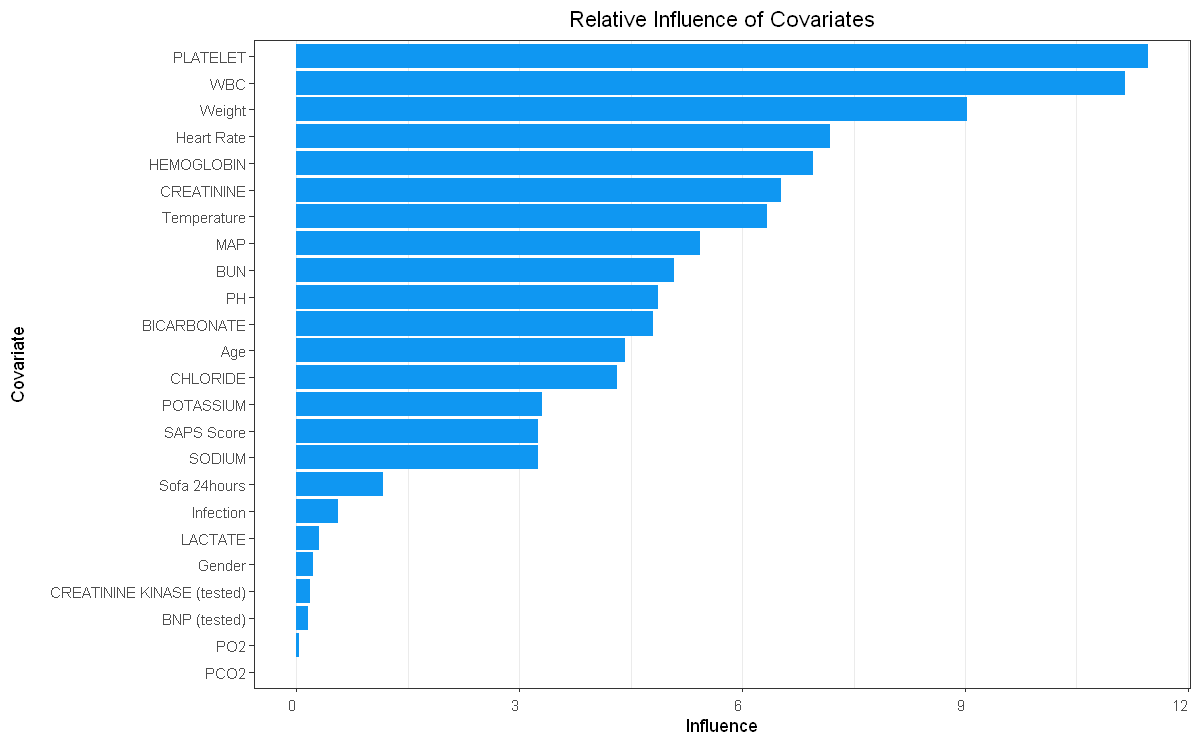

In [14]:
library("ggplot2")


importance <- importance[order(importance$inf),]

ggplot(data = importance) +
  geom_bar(aes(y = reorder(cov, inf), x = inf), stat = "identity",
           fill = "#0f97f2") +  
  labs(y = "Covariate", x = "Influence", title = "Relative Influence of Covariates") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 0, hjust = 1, vjust = .5),
        panel.grid.minor.y = element_blank(), panel.grid.major.y = element_blank(),
        plot.title = element_text(hjust = 0.5))